## Solubility of Biphenyl in Supercritical CO2 with Cosolvent

Following solubility calculations were carried out based on example 7.6 in the <a href="https://www.sciencedirect.com/bookseries/supercritical-fluid-science-and-technology/vol/4/suppl/C">Introduction to Supercritical Fluids A Spreadsheet-based Approach.<a>



### Colab Adjustments

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
%cd /content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2

/content/gdrive/MyDrive/Python_Projects/solubility_in_sc_CO2


### Importing Packages

In [7]:
! pip install pyrenn

In [8]:
from fugacity_coeff import fugacity_scf
from mixing_parameters import a_mix, a_PRK, alpha, b_mix, b_PRK, a_star, b_star, a_m_cosolvent, a_s_cosolvent, b_m_cosolvent, b_s_cosolvent
from Z_prk import Z_PRK
from P_sat import P_sat
from find_solubility import find_solubility_cosol, find_solubility
from results import write_to_excel
from evaluate_model import AARD, plot_predictions, model_predictions
 

In [9]:
import numpy as np 
import sympy as sp
from sympy import pi
from sympy.abc import i
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from IPython.display import display
from sympy.interactive import init_printing
init_printing(use_latex=True)
from sympy import pprint

### Inputs

#### Temperature and Pressure Inputs

In [10]:
P_num = np.arange(start=100000, stop=20000000, step=100000) # Pa
T_num = 313.15 # in Kelvins
R_num = 8.314 #Pa . m3 . mol-1 . K-1

#### Binary Interaction Parameters

In [11]:
k_num = np.array([[0, 0.08,0],[0.08,0, 0],[0,0,0]])
l_num = np.array([[0,-0.04,0],[-0.04,0,0],[0,0,0]])

#### Biphenyl Properties

In [12]:
T_c_bi = 773
P_c_bi = 3380000
w_bi = 0.4040
v_solid_num = 148.14/10**(6) # m3/mol

In [13]:
P_sub_num = P_sat(30.608, 9115.9, 0, T_num)

### CO2 Properties

In [14]:
T_c_co2 = 304.25
P_c_co2 = 7377300 # Pa
w_co2 = 0.225

### Toluene Properties

In [15]:
T_c_tol = 591.7
P_c_tol= 4112780 # Pa
w_tol= 0.2570

### Calculations

#### Mixing Parameters

In [16]:
alpha_co2 = alpha(w_co2, T_num, T_c_co2)
alpha_bi = alpha(w_bi, T_num, T_c_bi)
alpha_tol = alpha(w_tol, T_num, T_c_tol)
a_PRK_CO2 = a_PRK(P_c_co2, T_c_co2, R_num) * alpha_co2
a_PRK_bi = a_PRK(P_c_bi, T_c_bi, R_num) * alpha_bi
a_PRK_tol = a_PRK(P_c_tol, T_c_tol, R_num) * alpha_tol

b_PRK_CO2 = b_PRK(P_c_co2, T_c_co2, R_num)
b_PRK_bi = b_PRK(P_c_bi, T_c_bi, R_num)
b_PRK_tol = b_PRK(P_c_tol, T_c_tol, R_num)

### Calculation of solubility step by step


Calculation of constant a_mix in Van der Vaals mixing rules



  1     1                      
 ___   ___                     
 ╲     ╲                       
  ╲     ╲                      
  ╱     ╱   a[(i, j)]⋅y[i]⋅y[j]
 ╱     ╱                       
 ‾‾‾   ‾‾‾                     
i = 0 j = 0                    

  1      1                                                                    
______ ______                                                                 
╲      ╲                                                                      
 ╲      ╲                                                                     
  ╲      ╲              ⎛⎡                 _____                          ⎤⎞  
   ╲      ╲             ⎜⎢                ╱   2      _______              ⎥⎟  
    ╲      ╲            ⎜⎢(1 - k[0, 0])⋅╲╱  a₁     ╲╱ a₁⋅a₂ ⋅(1 - k[0, 1])⎥⎟  
    ╱      ╱  y[i]⋅y[j]⋅⎜⎢                                                ⎥⎟[i
   ╱      ╱             ⎜⎢                                          _____ ⎥⎟  
  ╱      ╱              ⎜⎢  _______                                ╱   2  ⎥⎟  
 ╱      ╱               ⎝⎣╲╱ a₁⋅a₂ ⋅(1 - k[1, 0])  (1 - k[1, 1])⋅╲╱  a₂   ⎦⎠  
╱      ╱                                                                      
‾‾‾‾‾‾ ‾‾‾‾‾‾                                       

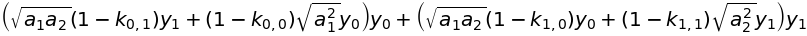


Calculation of constant b_mix in Van der Vaals mixing rules 



  1     1                      
 ___   ___                     
 ╲     ╲                       
  ╲     ╲                      
  ╱     ╱   b[(i, j)]⋅y[i]⋅y[j]
 ╱     ╱                       
 ‾‾‾   ‾‾‾                     
i = 0 j = 0                    

  1     1                                                                     
 ____  ____                                                                   
 ╲     ╲                                                                      
  ╲     ╲                                                                     
   ╲     ╲            ⎛⎡  2⋅b₁⋅(0.5 - 0.5⋅l[0, 0])     (0.5 - 0.5⋅l[0, 1])⋅(b₁
   ╱     ╱  y[i]⋅y[j]⋅⎜⎢                                                      
  ╱     ╱             ⎝⎣(0.5 - 0.5⋅l[1, 0])⋅(b₁ + b₂)    2⋅b₂⋅(0.5 - 0.5⋅l[1, 
 ╱     ╱                                                                      
 ‾‾‾‾  ‾‾‾‾                                                                   
i = 0 j = 0                                                                   

              
              
              
              
 + b₂)⎤⎞      
      ⎥⎟[i, j]
1])   ⎦⎠      
              
              
              

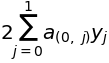

    1                                                                 
   ____                                                               
   ╲                                                                  
    ╲                                                                 
     ╲       ⎛⎡                 _____                         ⎤⎞      
2⋅   ╱  y[j]⋅⎜⎢                ╱   2     _______              ⎥⎟[0, j]
    ╱        ⎝⎣(1 - k[0, 0])⋅╲╱  a₁    ╲╱ a₁⋅a₂ ⋅(1 - k[0, 1])⎦⎠      
   ╱                                                                  
   ‾‾‾‾                                                               
  j = 0                                                               

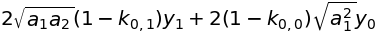

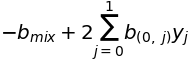

            1                                                                 
           ___                                                                
           ╲                                                                  
            ╲                                                                 
-bₘᵢₓ + 2⋅  ╱   y[j]⋅([2⋅b₁⋅(0.5 - 0.5⋅l[0, 0])  (0.5 - 0.5⋅l[0, 1])⋅(b₁ + b₂)
           ╱                                                                  
           ‾‾‾                                                                
          j = 0                                                               

        
        
        
        
])[0, j]
        
        
        


Calculation of the fugacity of the component in supercritical phase



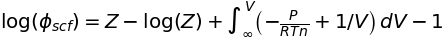

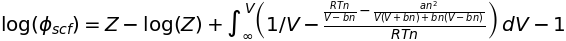

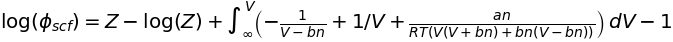

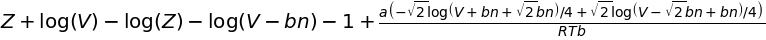

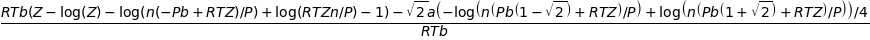

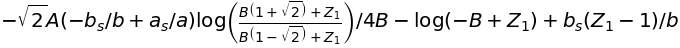

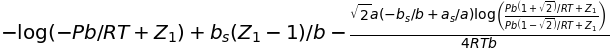


Calculation of the solubility of the component in supercritical phase 
 


Enhancement Factor: 14057.609064890503 
Poynting Correction: 2.0952978646499
Fugacity: 0.00014905079910658482
Z= 0.30964523275143985
Calculated Solubility: 0.00483501363828513

Calculation of the solubility of the component in supercritical phase 
 


Enhancement Factor: 14461.320951693486 
Poynting Correction: 2.0952978646499
Fugacity: 0.0001448897975260366
Z= 0.3089048914038446
Calculated Solubility: 0.004973867441205666

Calculation of the solubility of the component in supercritical phase 
 


Enhancement Factor: 14538.025241368909 
Poynting Correction: 2.0952978646499
Fugacity: 0.00014412534232555822
Z= 0.30876863413020955
Calculated Solubility: 0.005000249330542871

Calculation of the solubility of the component in supercritical phase 
 


Enhancement Factor: 14552.621372211852 
Poynting Correction: 2.0952978646499
Fugacity: 0.00014398078607685483
Z= 0.3087428604453363
Calculated Solubility: 0.0050052695648776045

Calculation of the solubility of the component in supercritical phase 
 


Enhancement Factor: 14555.399697131026 
Poynting Correction: 2.0952978646499
Fugacity: 0.00014395330312110208
Z= 0.3087379600889104
Calculated Solubility: 0.005006225149772147


In [17]:
find_solubility(v_solid_num, 13000000, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_bi, b_PRK_CO2, b_PRK_bi, k_num, l_num, disp=True)


Calculation of constant a_mix in Van der Vaals mixing rules for three component system 
 


  2     2                      
 ___   ___                     
 ╲     ╲                       
  ╲     ╲                      
  ╱     ╱   a[(i, j)]⋅y[i]⋅y[j]
 ╱     ╱                       
 ‾‾‾   ‾‾‾                     
i = 0 j = 0                    

   2        2                                                                 
________ ________                                                             
╲        ╲                                                                    
 ╲        ╲                                                                   
  ╲        ╲                ⎛⎡                 _____                          
   ╲        ╲               ⎜⎢                ╱   2      _______              
    ╲        ╲              ⎜⎢(1 - k[0, 0])⋅╲╱  a₁     ╲╱ a₁⋅a₂ ⋅(1 - k[0, 1])
     ╲        ╲             ⎜⎢                                                
      ╲        ╲            ⎜⎢                                          _____ 
      ╱        ╱  y[i]⋅y[j]⋅⎜⎢  _______                                ╱   2  
     ╱        ╱             ⎜⎢╲╱ a₁⋅a₂ ⋅(1 - k[1, 0])  (1 - k[1, 1])⋅╲╱  a₂   
    ╱        ╱              ⎜⎢                                                
   ╱        ╱               ⎜⎢                      

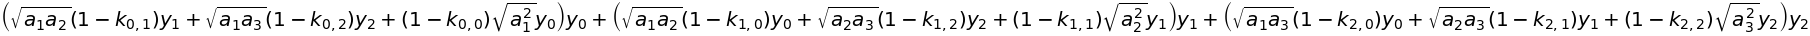


Calculation of constant b_mix in Van der Vaals mixing rules for three component system 



  2     2                      
 ___   ___                     
 ╲     ╲                       
  ╲     ╲                      
  ╱     ╱   b[(i, j)]⋅y[i]⋅y[j]
 ╱     ╱                       
 ‾‾‾   ‾‾‾                     
i = 0 j = 0                    

  2     2                                                                     
_____ _____                                                                   
╲     ╲                                                                       
 ╲     ╲                                                                      
  ╲     ╲             ⎛⎡  2⋅b₁⋅(0.5 - 0.5⋅l[0, 0])     (0.5 - 0.5⋅l[0, 1])⋅(b₁
   ╲     ╲            ⎜⎢                                                      
   ╱     ╱  y[i]⋅y[j]⋅⎜⎢(0.5 - 0.5⋅l[1, 0])⋅(b₁ + b₂)    2⋅b₂⋅(0.5 - 0.5⋅l[1, 
  ╱     ╱             ⎜⎢                                                      
 ╱     ╱              ⎝⎣(0.5 - 0.5⋅l[2, 0])⋅(b₁ + b₃)  (0.5 - 0.5⋅l[2, 1])⋅(b₂
╱     ╱                                                                       
‾‾‾‾‾ ‾‾‾‾‾                                                                   
i = 0 j = 0                                                                   

                                             
     

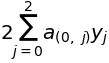

    2                                                                         
   ____                                                                       
   ╲                                                                          
    ╲                                                                         
     ╲       ⎛⎡                 _____                                         
2⋅   ╱  y[j]⋅⎜⎢                ╱   2     _______                  _______     
    ╱        ⎝⎣(1 - k[0, 0])⋅╲╱  a₁    ╲╱ a₁⋅a₂ ⋅(1 - k[0, 1])  ╲╱ a₁⋅a₃ ⋅(1 -
   ╱                                                                          
   ‾‾‾‾                                                                       
  j = 0                                                                       

                 
                 
                 
                 
         ⎤⎞      
         ⎥⎟[0, j]
 k[0, 2])⎦⎠      
                 
                 
                 

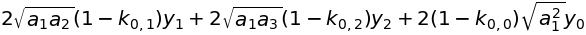

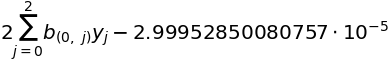

    2                                                                         
   ___                                                                        
   ╲                                                                          
    ╲                                                                         
2⋅  ╱   y[j]⋅([2⋅b₁⋅(0.5 - 0.5⋅l[0, 0])  (0.5 - 0.5⋅l[0, 1])⋅(b₁ + b₂)  (0.5 -
   ╱                                                                          
   ‾‾‾                                                                        
  j = 0                                                                       

                                                     
                                                     
                                                     
                                                     
 0.5⋅l[0, 2])⋅(b₁ + b₃)])[0, j] - 2.99952850080757e-5
                                                     
                                           


Calculation of the fugacity of the component in supercritical phase



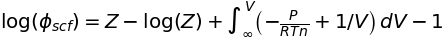

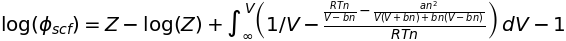

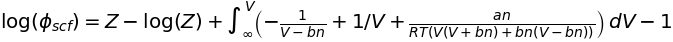

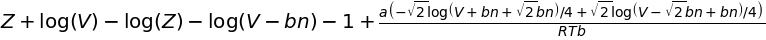

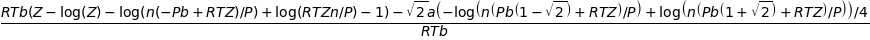

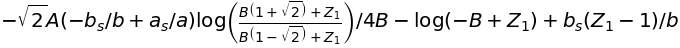

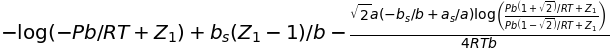


Calculation of the solubility of the component in supercritical phase



Enhancement Factor: 36026.49163132903 
Poynting Correction: 2.0952978646499
Fugacity: 5.8159919819331125e-05
Z= 0.2875698247036836
Calculated Solubility: 0.012391052957368446

Calculation of the solubility of the component in supercritical phase



Enhancement Factor: 38089.61978658769 
Poynting Correction: 2.0952978646499
Fugacity: 5.500968180805279e-05
Z= 0.28770211837741433
Calculated Solubility: 0.0131006510634304

Calculation of the solubility of the component in supercritical phase



Enhancement Factor: 38672.87197954903 
Poynting Correction: 2.0952978646499
Fugacity: 5.4180042944778816e-05
Z= 0.28775061511281724
Calculated Solubility: 0.0133012564647124

Calculation of the solubility of the component in supercritical phase



Enhancement Factor: 38838.5275803765 
Poynting Correction: 2.0952978646499
Fugacity: 5.394895211497583e-05
Z= 0.28776521917017145
Calculated Solubility: 0.013358232518432624

Calculation of the solubility of the component in supercritical phase



Enhancement Factor: 38885.638832454344 
Poynting Correction: 2.0952978646499
Fugacity: 5.388359115502414e-05
Z= 0.2877694382005608
Calculated Solubility: 0.013374436095104986

Calculation of the solubility of the component in supercritical phase



Enhancement Factor: 38899.04191031988 
Poynting Correction: 2.0952978646499
Fugacity: 5.3865024991631465e-05
Z= 0.2877706437980385
Calculated Solubility: 0.013379045987439858


In [18]:
find_solubility_cosol(0.05, v_solid_num, 13000000, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_bi, a_PRK_tol, b_PRK_CO2, b_PRK_bi, b_PRK_tol,  k_num, l_num, disp=True)

### Biphenyl Solubility Without Colsolvent

In [19]:
counter = 0
y_solubility = []
for i in P_num:
    y_final = find_solubility(v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_bi, b_PRK_CO2, b_PRK_bi, k_num, l_num)
    y_solubility.append(y_final)
    counter += 1
    print('%{0}'.format(str(100*counter/len(P_num))))

%0.5025125628140703
%1.0050251256281406
%1.5075376884422111
%2.0100502512562812
%2.512562814070352
%3.0150753768844223
%3.5175879396984926
%4.0201005025125625
%4.522613065326633
%5.025125628140704
%5.527638190954774
%6.030150753768845
%6.532663316582915
%7.035175879396985
%7.5376884422110555
%8.040201005025125
%8.542713567839195
%9.045226130653266
%9.547738693467336
%10.050251256281408
%10.552763819095478
%11.055276381909549
%11.557788944723619
%12.06030150753769
%12.56281407035176
%13.06532663316583
%13.5678391959799
%14.07035175879397
%14.57286432160804
%15.075376884422111
%15.577889447236181
%16.08040201005025
%16.582914572864322
%17.08542713567839
%17.587939698492463
%18.09045226130653
%18.592964824120603
%19.09547738693467
%19.597989949748744
%20.100502512562816
%20.603015075376884
%21.105527638190956
%21.608040201005025
%22.110552763819097
%22.613065326633166
%23.115577889447238
%23.618090452261306
%24.12060301507538
%24.623115577889447
%25.12562814070352
%25.628140703517587
%26.

In [20]:
write_to_excel(P_num, y_solubility,  path='ExcelFiles/y_biphenyl.xlsx')

In [71]:
mpl.pyplot.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


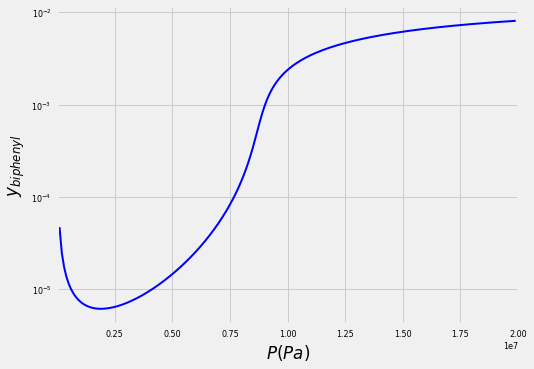

In [84]:

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.1, 20000000)

ax.set_xlabel('$P (Pa)$')
ax.set_ylabel('$y_{biphenyl}$')
ax.set_yscale("log")
ax.plot(P_num, y_solubility, color='blue', label='without cosolvent', linewidth=2)

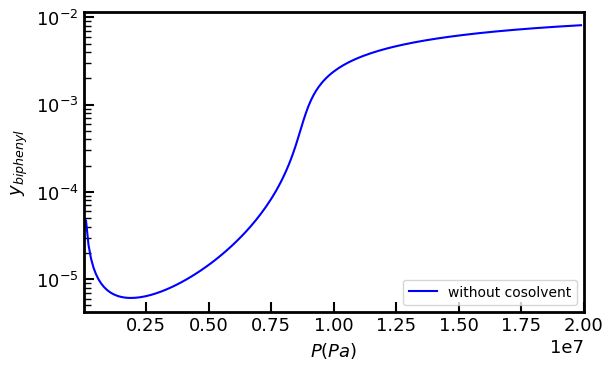

In [129]:
# Create figure and add axes object
mpl.style.use('default')

fig = plt.figure(figsize=(5, 3), dpi=100)
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.1, 20000000)

ax.xaxis.set_tick_params(which='major', size=7, width=1.5, direction='in')
ax.yaxis.set_tick_params(which='major', size=7, width=1.5, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in')

ax.set_xlabel('$P (Pa)$')
ax.set_ylabel('$y_{biphenyl}$')
ax.set_yscale("log")
ax.plot(P_num, y_solubility, color='blue', label='without cosolvent', linewidth=1.5)
plt.legend(loc='lower right', prop={'size': 10})
fig.show()

### Biphenyl solubility in scCO2 with cosolvent

In [131]:
y_tol = 0.03

In [133]:
counter = 0
y_solubility_tol = []
for i in P_num:
    y_final = find_solubility_cosol(y_tol, v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_bi, a_PRK_tol, b_PRK_CO2, b_PRK_bi, b_PRK_tol,  k_num, l_num)
    y_solubility_tol.append(y_final)
    counter += 1
    print('%{0}'.format(str(100*counter/len(P_num))))

%0.5025125628140703
%1.0050251256281406
%1.5075376884422111
%2.0100502512562812
%2.512562814070352
%3.0150753768844223
%3.5175879396984926
%4.0201005025125625
%4.522613065326633
%5.025125628140704
%5.527638190954774
%6.030150753768845
%6.532663316582915
%7.035175879396985
%7.5376884422110555
%8.040201005025125
%8.542713567839195
%9.045226130653266
%9.547738693467336
%10.050251256281408
%10.552763819095478
%11.055276381909549
%11.557788944723619
%12.06030150753769
%12.56281407035176
%13.06532663316583
%13.5678391959799
%14.07035175879397
%14.57286432160804
%15.075376884422111
%15.577889447236181
%16.08040201005025
%16.582914572864322
%17.08542713567839
%17.587939698492463
%18.09045226130653
%18.592964824120603
%19.09547738693467
%19.597989949748744
%20.100502512562816
%20.603015075376884
%21.105527638190956
%21.608040201005025
%22.110552763819097
%22.613065326633166
%23.115577889447238
%23.618090452261306
%24.12060301507538
%24.623115577889447
%25.12562814070352
%25.628140703517587
%26.

In [134]:
write_to_excel(P_num, y_solubility_tol,  path='ExcelFiles/y_biphenyl_tol.xlsx')

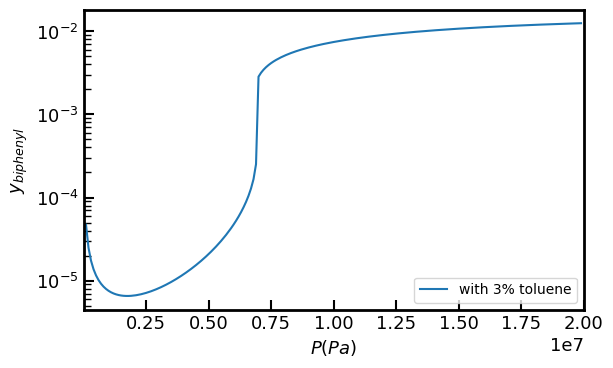

In [138]:
# Create figure and add axes object
mpl.style.use('default')

fig = plt.figure(figsize=(5, 3), dpi=100)
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.1, 20000000)

ax.xaxis.set_tick_params(which='major', size=7, width=1.5, direction='in')
ax.yaxis.set_tick_params(which='major', size=7, width=1.5, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in')

ax.set_xlabel('$P (Pa)$')
ax.set_ylabel('$y_{biphenyl}$')
ax.set_yscale("log")
ax.plot(P_num, y_solubility_tol, label='with 3% toluene', linewidth=1.5)
plt.legend(loc='lower right', prop={'size': 10})
fig.show()

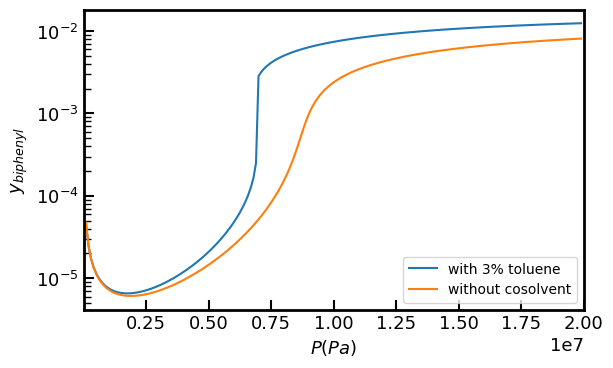

In [137]:
# Create figure and add axes object
mpl.style.use('default')

fig = plt.figure(figsize=(5, 3), dpi=100)
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 2

ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.1, 20000000)

ax.xaxis.set_tick_params(which='major', size=7, width=1.5, direction='in')
ax.yaxis.set_tick_params(which='major', size=7, width=1.5, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in')

ax.set_xlabel('$P (Pa)$')
ax.set_ylabel('$y_{biphenyl}$')
ax.set_yscale("log")
ax.plot(P_num, y_solubility_tol, label='with 3% toluene', linewidth=1.5)
ax.plot(P_num, y_solubility, label='without cosolvent', linewidth=1.5)

plt.legend(loc='lower right', prop={'size': 10})
fig.show()